In [5]:
from datasets import load_dataset
import pandas as pd
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import email
from email.parser import Parser
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.ticker as ticker

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alfar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alfar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [10]:
data = load_dataset("zefang-liu/phishing-email-dataset")

df = data['train'].to_pandas()

print(df.head())
print(df.info)
print(df.shape)
print(df.columns)

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  
<bound method DataFrame.info of        Unnamed: 0                                         Email Text  \
0               0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1               1  the other side of * galicismos * * galicismo *...   
2               2  re : equistar deal tickets are you still avail...   
3               3  \nHello I am your hot lil horny toy.\n    I am...   
4               4  software at incredibly low prices ( 86 % lower...   
...    

Class distribution

Dataset distribution: 
Safe Email        11322
Phishing Email     7328
Name: Email Type, dtype: int64


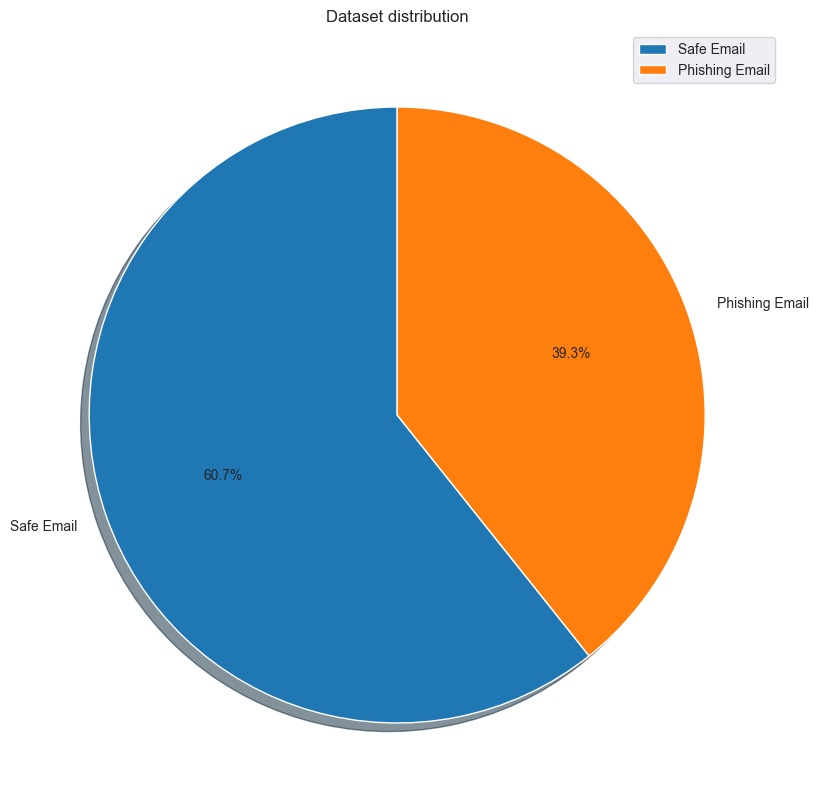

In [13]:
print("Dataset distribution: ")
class_counts = df['Email Type'].value_counts()
print(class_counts)

# Pie chart distribution
plt.figure(figsize=(10, 10))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Dataset distribution')
plt.legend(class_counts.index, loc='best')
plt.show()